# Lesson: Anomaly Detection - CONTINUOUS PROBABALISTIC METHODS
<a href = "https://www.canva.com/design/DAFlVKoXNLY/IKdkPyhMGxsubYKNPXpchg/view?utm_content=DAFlVKoXNLY&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">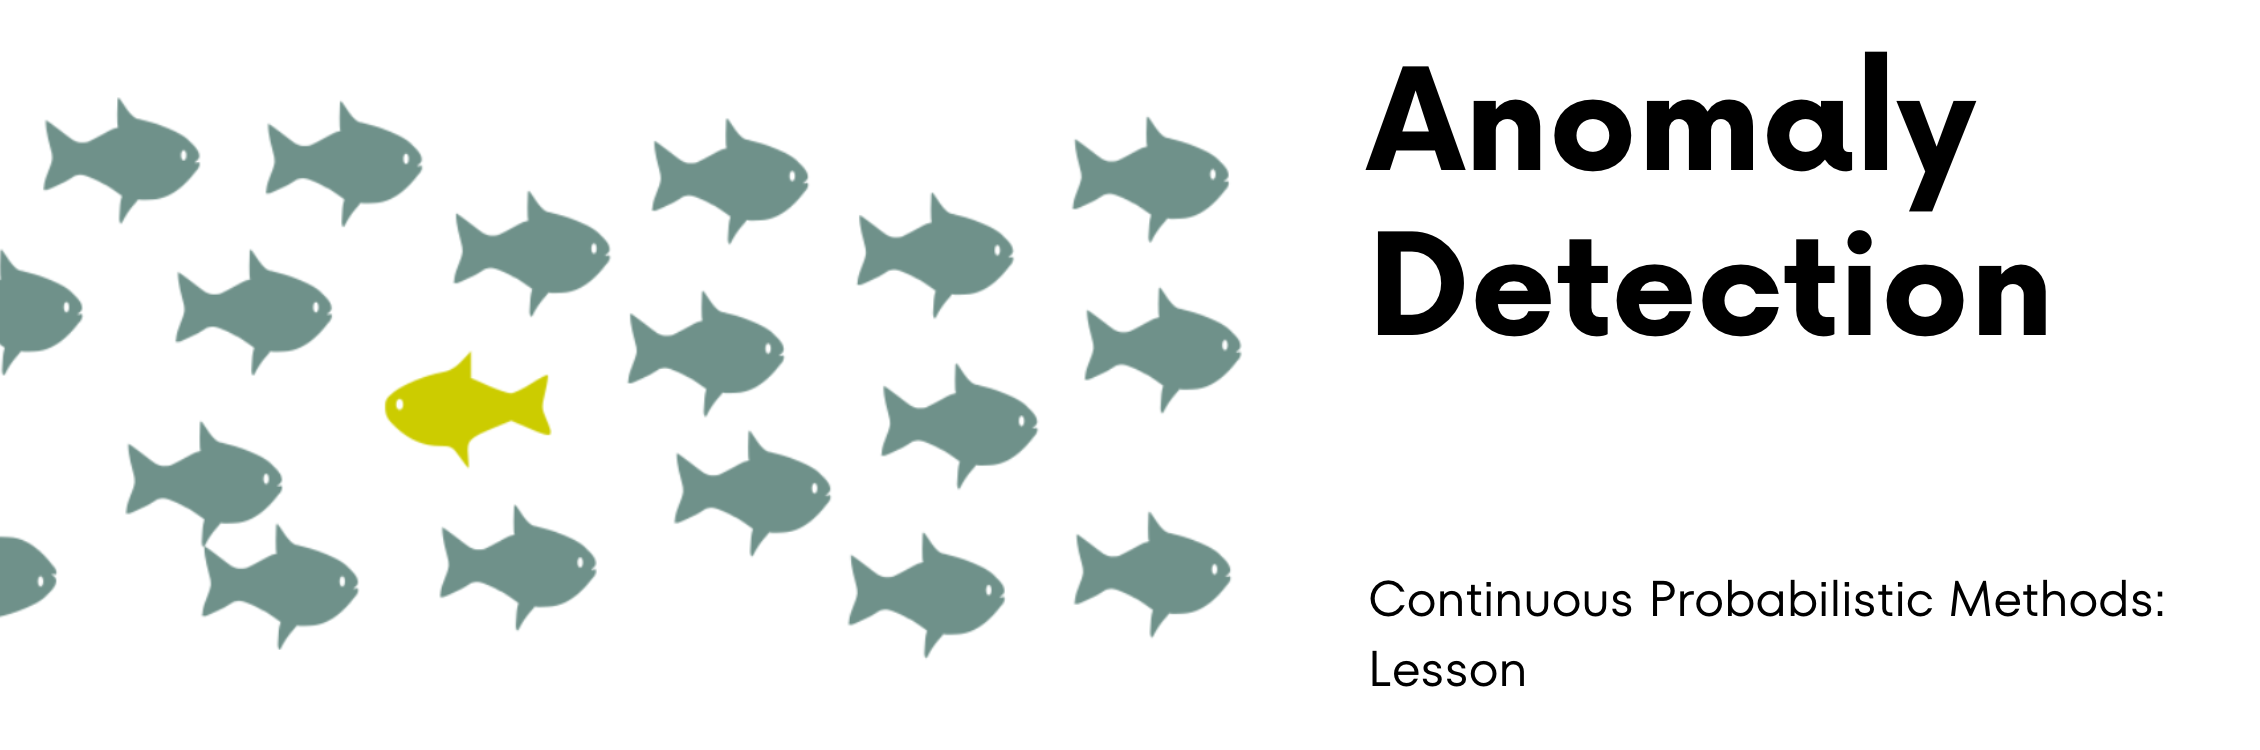</a>

<hr style="border:2px solid gray">

In [1]:
#IMPORTS

import numpy as np
import pandas as pd
#vizs
import matplotlib.pyplot as plt
import seaborn as sns
#math
import itertools
#dataset
from pydataset import data

## Visualize the data to see the distribution, trend, shape:

- [Boxplots](https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)
- [Scatterplots](https://www.machinelearningplus.com/plots/python-scatter-plot)
- [Histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

___
# Ascombe's Quartet:

> Anscombe's Quartet serves as a demonstration that summary statistics alone may not adequately capture the nature and patterns present within a dataset. 
> 
> It highlights the importance of data visualization in understanding the underlying structure of data and making meaningful interpretations.



In [2]:
url = "https://gist.githubusercontent.com/o0amandagomez0o/4b828b825a2f2dd71320d6f09fc4905e/raw/quartet.csv"

df = pd.read_csv(url)

In [3]:
# peek at the head, what this data set looks like
df.head()

,id,dataset,x,y
0,1,I,10.0,8.04
1,2,I,8.0,6.95
2,3,I,13.0,7.58
3,4,I,9.0,8.81
4,5,I,11.0,8.33


In [4]:
df.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

In [5]:
df.pivot(index = 'id', columns='dataset')

x                        y                    
dataset     I    II   III    IV      I    II    III     IV
id                                                        
1        10.0  10.0  10.0   8.0   8.04  9.14   7.46   6.58
2         8.0   8.0   8.0   8.0   6.95  8.14   6.77   5.76
3        13.0  13.0  13.0   8.0   7.58  8.74  12.74   7.71
4         9.0   9.0   9.0   8.0   8.81  8.77   7.11   8.84
5        11.0  11.0  11.0   8.0   8.33  9.26   7.81   8.47
6        14.0  14.0  14.0   8.0   9.96  8.10   8.84   7.04
7         6.0   6.0   6.0   8.0   7.24  6.13   6.08   5.25
8         4.0   4.0   4.0  19.0   4.26  3.10   5.39  12.50
9        12.0  12.0  12.0   8.0  10.84  9.13   8.15   5.56
10        7.0   7.0   7.0   8.0   4.82  7.26   6.42   7.91
11        5.0   5.0   5.0   8.0   5.68  4.74   5.73   6.89

In [6]:
df.groupby('dataset').describe()

id                                              x       ...        \
        count mean       std  min  25%  50%  75%   max count mean  ...   75%   
dataset                                                            ...         
I        11.0  6.0  3.316625  1.0  3.5  6.0  8.5  11.0  11.0  9.0  ...  11.5   
II       11.0  6.0  3.316625  1.0  3.5  6.0  8.5  11.0  11.0  9.0  ...  11.5   
III      11.0  6.0  3.316625  1.0  3.5  6.0  8.5  11.0  11.0  9.0  ...  11.5   
IV       11.0  6.0  3.316625  1.0  3.5  6.0  8.5  11.0  11.0  9.0  ...   8.0   

                  y                                                      
          max count      mean       std   min    25%   50%   75%    max  
dataset                                                                  
I        14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV       19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

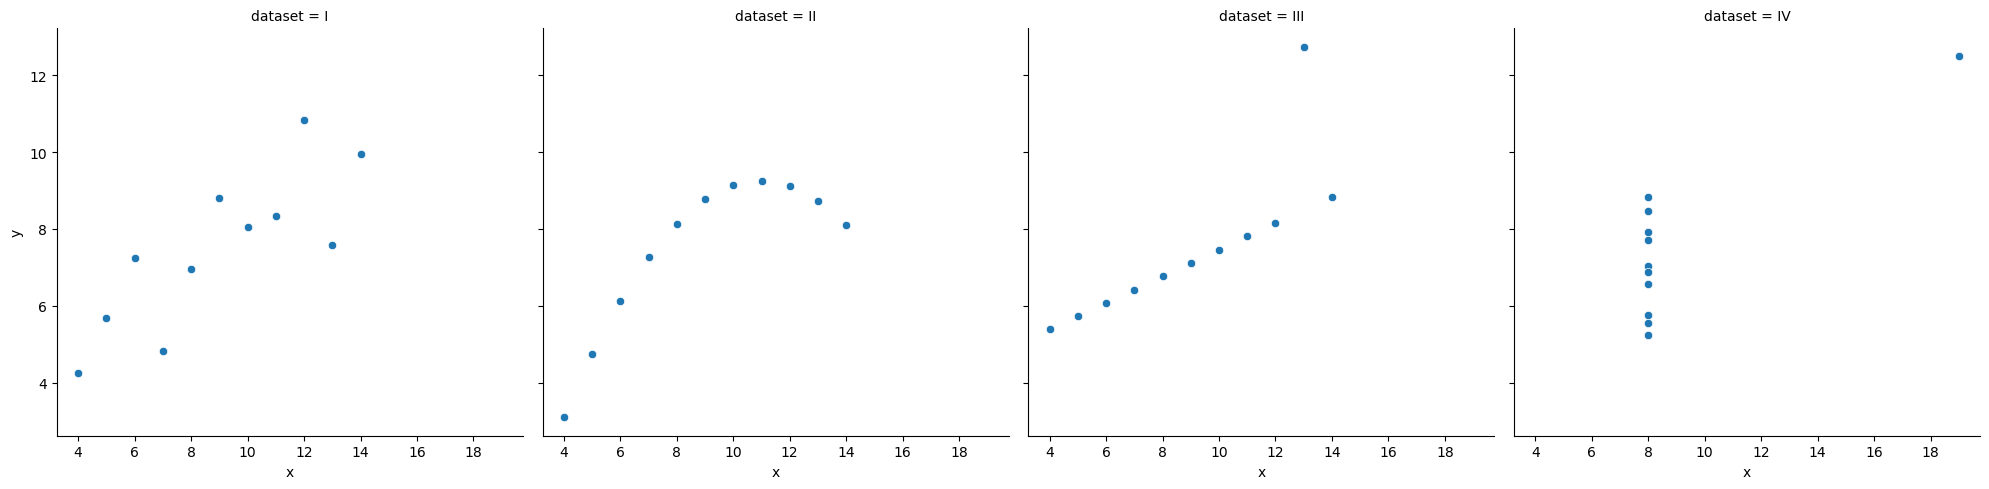

In [7]:
sns.relplot(x='x', y='y', col='dataset', data=df)

## Leave it to nerds to take this idea and run with it....
![ancombesquartet](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZGQ0MjQ0NzZhYjYwMGM1YTRlODQ2NjJiMzM5Njk1MzhhMDA1MmZmOSZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/OcICizrGulz6muna8Z/giphy.gif)

## Swiss Dataset

In [8]:
df = data('swiss')

In [9]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [11]:
# get the stats via describe
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


### <a href="https://numpy.org/doc/stable/reference/generated/numpy.issubdtype.html">`np.issubdtype` Documentation</a>

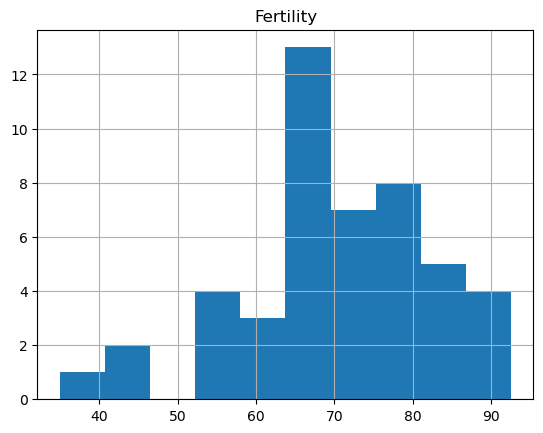

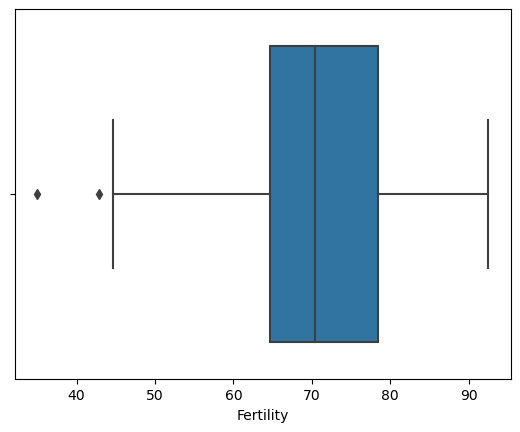

-----------------------------------


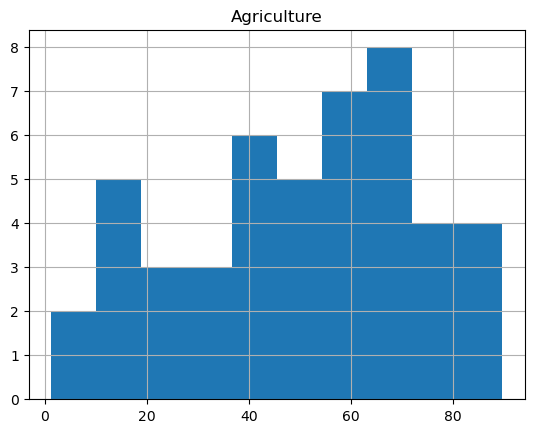

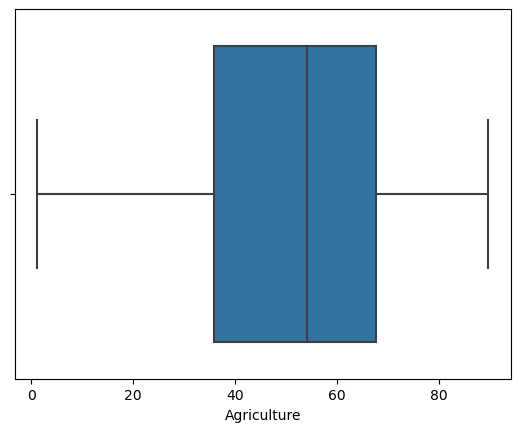

-----------------------------------


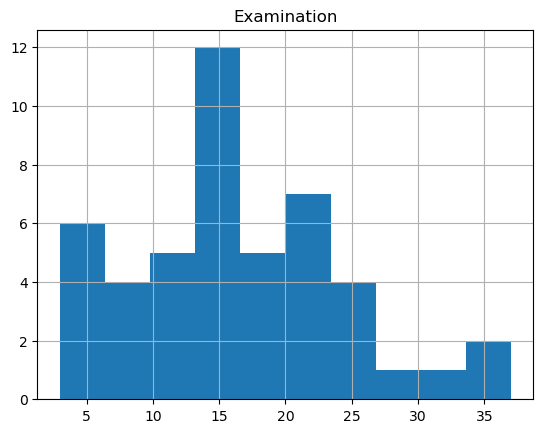

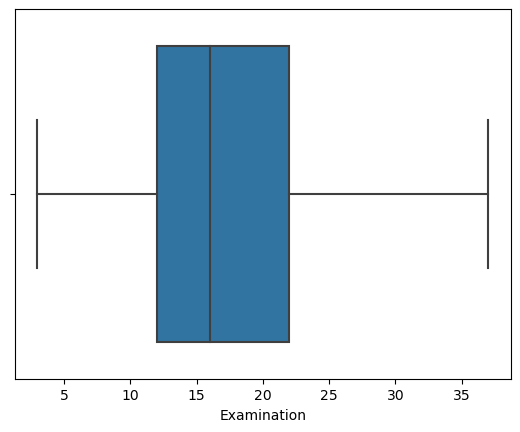

-----------------------------------


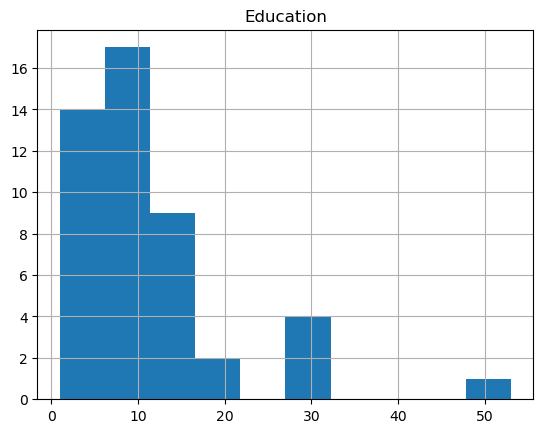

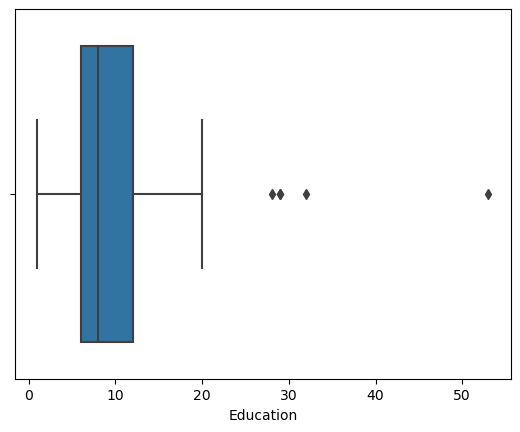

-----------------------------------


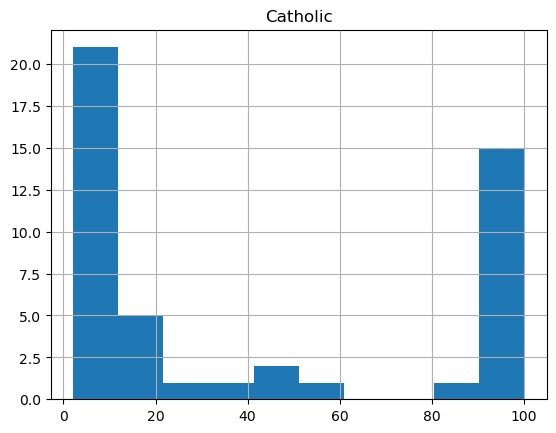

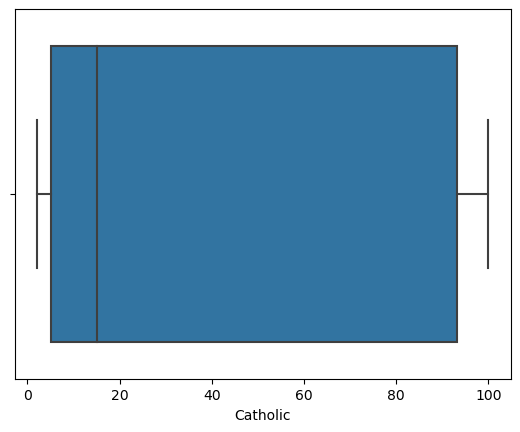

-----------------------------------


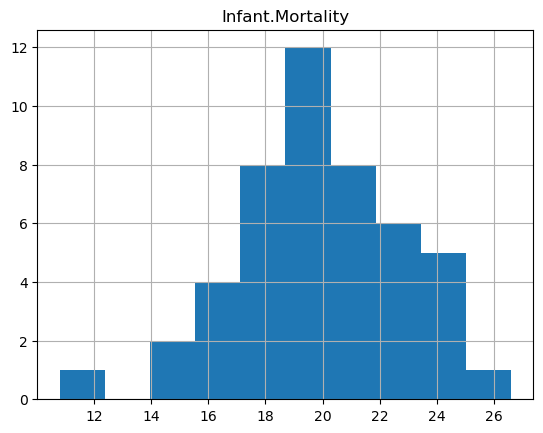

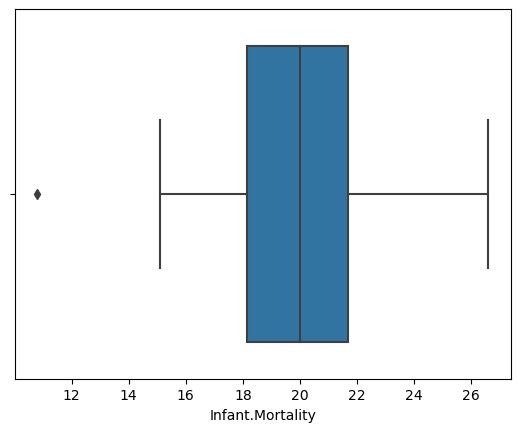

-----------------------------------


In [14]:
# iterate through columns and create histograms
for col in df.columns:
#     determine that it is a number type
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()
        print('----------------------------------------------------------------')

In [15]:
sns.pairplot(df)

___
# Using Z-score
- How far is an observation from mean?

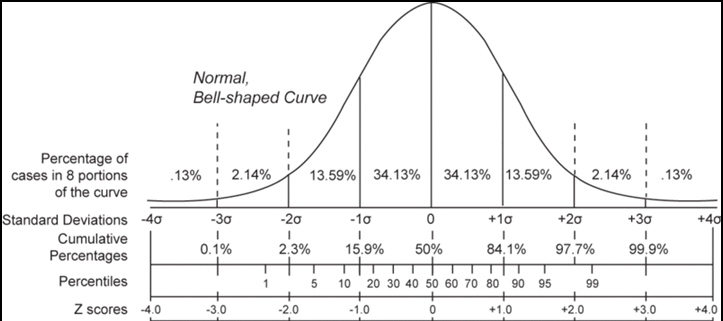

source: https://en.wikipedia.org/wiki/File:Normal_distribution_and_scales.gif

### Exponential Tails of the Normal Distribution
| Range | Expected Fraction of Population Inside Range | Approximate Expected Frequency Outside Range | Approximate frequency for daily event |
| ----- | -------------------------------------------- | -------------------------------------------- | -------------------------------------------- |
| μ ± 0.5σ | 0.382924922548026                            | 2 in 3 |Four or five times a week|
| μ ± σ | 0.682689492137086 | 1 in 3 |Twice a week|
| μ ± 1.5σ | 0.866385597462284 | 1 in 7 |Weekly|
| μ ± 2σ | 0.954499736103642 | 1 in 22 |Every three weeks|
| μ ± 2.5σ | 0.987580669348448 | 1 in 81 |Quarterly|
| μ ± 3σ | 0.997300203936740 | 1 in 370 |Yearly|
| μ ± 3.5σ | 0.999534741841929 | 1 in 2149 |Every 6 years|
| μ ± 4σ | 0.999936657516334 | 1 in 15,787 |Every 43 years|
| μ ± 4.5σ | 0.999993204653751 | 1 in 147,160 |Every 403 years|
| μ ± 5σ | 0.999999426696856 | 1 in 744,278 |Every 4776 years|
| μ ± 5.5σ | 0.999999962020875 | 1 in 26,330,254 |Every 72,090 years|
| μ ± 6σ | 0.999999998026825 | 1 in 506,797,346 |Every 1.38 million years|

___
# Beware: "Black Swan" events

- Phenomenally low frequency events that have an exponentially powerful impact
- Is outlier (outside the realm of our expectation)
- Has major impact
- predictable (atleast in hindsight)
- Examples ?

In [ ]:
# z-score:
# subtract from the mean, divide by the standard deviation
# i.e (x - x_mean) / x_std

df['inf_mort_zs'] = ((df['Infant.Mortality'] - df['Infant.Mortality'].mean())
                     / df['Infant.Mortality'].std())
df.head()

In [ ]:
# Which provinces have very high/low infant mortality

df[df['inf_mort_zs'].abs() >= 3]

## Using IQR

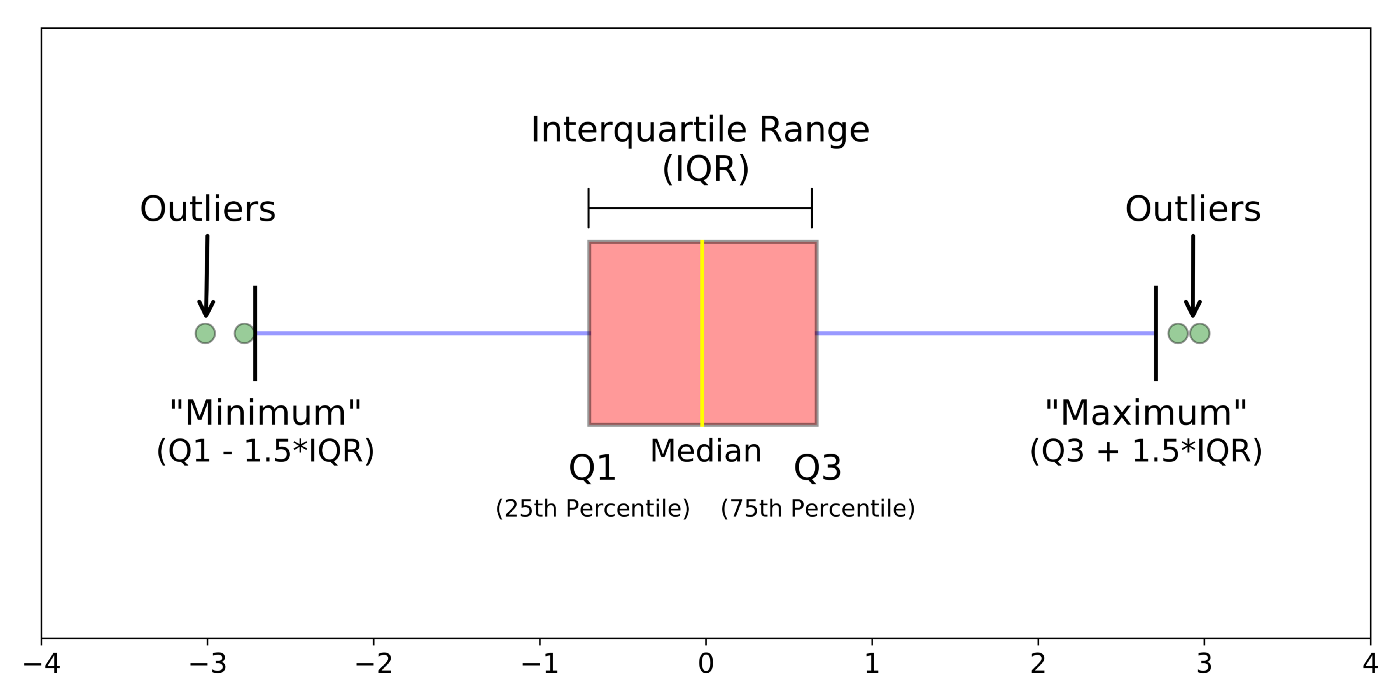

source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [ ]:
# steps to defining IQR/Tukey method:
# get the Q1 and Q3 values
# determine our multiplier
# use these qualities to assert abnormalities

In [ ]:
# infant mortality
multiplier = 1.5
q1 = df['Infant.Mortality'].quantile(0.25)
q3 = df['Infant.Mortality'].quantile(0.75)

In [ ]:
# calculate iqr
iqr = q3 - q1

In [ ]:
# calculate upper and lower limits for the whiskers
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [ ]:
# which observations in dataframe are outliers based on IQR rule?
df[(df['Infant.Mortality'] < inner_lower_fence) | (df['Infant.Mortality'] > inner_upper_fence)]

In [10]:
dfp = df.pivot(index = 'id', columns='dataset').T.reset_index()

KeyError: "None of ['id', 'dataset'] are in the columns"

In [ ]:
dfp

In [ ]:
dfm = dfp.melt(id_vars=['level_0', 'dataset'], var_name='tid')

In [ ]:
dfm.pivot_table(index=['dataset','tid'], columns='level_0', values='value').reset_index()

In [ ]:
dfm.pivot_table(index=['dataset','tid'], columns='level_0', values='value').reset_index().pivot(index='tid', columns='dataset')

In [ ]:
1, I, x, 10.0 
1, I, y, 8.04
2, I, x, 8.0 
2, I, y, 6.95
3, I, x, 13.0 
3, I, y, 7.58
4, I, x, 9.0 
4, I, y, 8.81
5, I, x, 11.0 
5, I, y, 8.33
6, I, x, 14.0 
6, I, y, 9.96
7, I, x, 6.0 
7, I, y, 7.24
8, I, x, 4.0 
8, I, y, 4.26
9, I, x, 12.0 
9, I, y, 10.84
10, I, x, 7.0 
10, I, y, 4.82
11, I, x, 5.0 
11, I, y, 5.68
1, II, x, 10.0 
1, II, y, 9.14
2, II, x, 8.0 
2, II, y, 8.14
3, II, x, 13.0 
3, II, y, 8.74
4, II, x, 9.0 
4, II, y, 8.77
5, II, x, 11.0 
5, II, y, 9.26
6, II, x, 14.0 
6, II, y, 8.1
7, II, x, 6.0 
7, II, y, 6.13
8, II, x, 4.0 
8, II, y, 3.1
9, II, x, 12.0 
9, II, y, 9.13
10, II, x, 7.0 
10, II, y, 7.26
11, II, x, 5.0 
11, II, y, 4.74
1, III, x, 10.0 
1, III, y, 7.46
2, III, x, 8.0 
2, III, y, 6.77
3, III, x, 13.0 
3, III, y, 12.74
4, III, x, 9.0 
4, III, y, 7.11
5, III, x, 11.0 
5, III, y, 7.81
6, III, x, 14.0 
6, III, y, 8.84
7, III, x, 6.0 
7, III, y, 6.08
8, III, x, 4.0 
8, III, y, 5.39
9, III, x, 12.0 
9, III, y, 8.15
10, III, x, 7.0 
10, III, y, 6.42
11, III, x, 5.0 
11, III, y, 5.73
1, IV, x, 8.0 
1, IV, y, 6.58
2, IV, x, 8.0 
2, IV, y, 5.76
3, IV, x, 8.0 
3, IV, y, 7.71
4, IV, x, 8.0 
4, IV, y, 8.84
5, IV, x, 8.0 
5, IV, y, 8.47
6, IV, x, 8.0 
6, IV, y, 7.04
7, IV, x, 8.0 
7, IV, y, 5.25
8, IV, x, 19.0 
8, IV, y, 12.5
9, IV, x, 8.0 
9, IV, y, 5.56
10, IV, x, 8.0 
10, IV, y, 7.91
11, IV, x, 8.0 
11, IV, y, 6.89